# Week 10: In-Class Assignment: <br> Gaussian Mixture Models

### <p style="text-align: right;"> &#9989; Kyle Taft
<p style="text-align: right;"> &#9989; Lucus, Jake Daniel

    
![AD](https://miro.medium.com/max/1048/1*XSvMTzJAOmEpe6oRs0C1Bw.png)
____


## Gaussian Mixture Models

You might want to skim your textbook on page 283 before you start this ICA. We didn't cover GMMs in lecture, so you will learn about them today. 

Earlier in the class we looked at using Gaussians and using them for doing simple anomaly detection. The basic idea was to use a multivariate Gaussian, which you can [review here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution), that tells you where the probabilites are high and where they are low. As a reminder, look at the picture above.

This is an example of unsupervised learning because the data points have no labels, they are just points. As with clustering, we wish to only use their locations to organize them in some way. Fitting them to a multivariate Gaussian works pretty well. 

But, as we saw with the various clustering algorithms, data often does not come to us as one "blob". There may be many blobs, or lines, or circles or moons. How do we do anomaly detection with these cluster shapes? 

GMMs are the obvious generalization of what we did earlier in the semester: if there are many clusters, use a mixture of Gaussians instead of just one. 

This might look something like this:

![gmm](https://miro.medium.com/max/753/1*lTv7e4Cdlp738X_WFZyZHA.png)

To make this more interesting, but still be able for our simple brains to visualize it, we'll do this in 2D. 

Before going further, you might quickly skim this notebook so that your group can divide and conquer. For example, 1-2 of you might write the multivaraite Gaussian function, 1-2 of you might work through the visualization, 1 person reads the textbook and so on...



In a sense, that is all there is to it. Of course, there are details. Go to [this page](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) in `sklearn` and read through the documentation. 

&#9989; **Questions:** With your group, answer these questions:
1. What are the main options/inputs you need to provide to `sklearn`'s GMM library? 
2. In particular, what is `covariance_type`?
3. Is `kmeans` used in any way? 
4. What are the outputs? For example, what does `.means_` give? What does `.predict` do? `weights_`? 
5. As with the clustering algorithms, how would we select the number of components? 
6. What are AIC and BIC (you will find these in the book)? 

Discuss [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) and [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) with your group in more depth. In a markdown cell, explain how these could be used in other contexts. (They are extremely useful and arise in many contexts, most quite different from what we are doing today.) 

1. The number of components is the main input. You can also specify the covariance type, and things like number of iterations or initial weights.
2. It allows for four options of covariance to be used: full, tied, diag, spherical. These can be useful in their own ways.
3. Kmeans is used to initalize the weights, the means and the precisions for the GMM.
4. It ouputs an object that has multiple attributes. weights_: The weight for each component, means_: the mean for each component, covariances_: the covariance for each component, and precisions_: the precision for each component. It also has a predict method that will predict the labels for the data.
5. The model uses the likelihood with AIC or BIC to select the number of components.
6. AIC and BIC are values calculated in order to compare models. AIC is from the log of the likelihood function and BIC is from the lowest test error used with number of observations.

---

### 1.2: Making Fake Data

Ok, enough thinking about GMMs, let's code them. First we need some data. We'll use the usual `sklearn` tools for making fake data. (If you have some particular data you would rather use, feel free to do that.) 

Write the code to make data at least five different ways, including options so that you can vary the size, shape and spread of the points. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_biclusters
from sklearn.datasets import make_checkerboard
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

In [2]:
num_points = 100
noise = 1.5

# Choose one of the datasets
X_data, y_labels = make_blobs(n_samples=num_points, centers = 3, n_features=2,  cluster_std=noise, random_state=42)
#X_data, rows, cols = make_checkerboard(shape=(num_points, 2), n_clusters=2, noise=noise, random_state=42)

# Uncomment the other dataset
# X_data, y_labels = make_moons(n_samples=num_points, noise=0.05 * noise, random_state=42)

Keep in mind that the `sklearn` libraries create the fake data to also be used with supervised classification. Here, we only use the labels as a guide to what `sklearn` was "thinking" when it made the fake data; otherwise, we don't use the labels for unsupervised clustering. (Feel free to just ignore the labels and colors if you want to make this more realistic.) 

Since we are examining anomaly detection, be sure you know how to control the noise levels within each `make_` library. 

Text(0, 0.5, 'Feature 2')

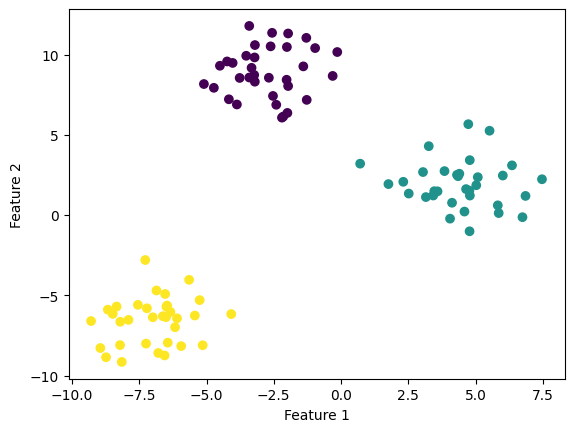

In [3]:
plt.scatter(X_data[:,0], X_data[:,1], c=y_labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Next, let's take this data and use the GMM to perform anomaly detection. 

I give some example code here and there to get you started. You might want to generalize some of it. For example, you might want to make it work better for a given number of Gaussian components that you can loop over, both in terms of creating them and plotting them. You get the idea: make the code your own and more streamlined than the simple examples I give. 

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
gmm_obj = GaussianMixture(n_components=3, random_state=0).fit(X_data)
print(f"\nThe means of the Gaussians in the GMM are:\n {gmm_obj.means_}.")
print(f"\nThe covariances of the Gaussians in the GMM are:\n {gmm_obj.covariances_}.")
print(f"\nThe weights of the Gaussians in the GMM are:\n {gmm_obj.weights_}.")


The means of the Gaussians in the GMM are:
 [[-6.98775083 -6.57427024]
 [ 4.42934209  1.92179312]
 [-2.74708562  8.89646372]].

The covariances of the Gaussians in the GMM are:
 [[[ 1.46823278  0.32963005]
  [ 0.32963005  2.08683797]]

 [[ 2.13818121 -0.23678127]
  [-0.23678127  2.08172631]]

 [[ 1.44509805  0.16836852]
  [ 0.16836852  2.38533246]]].

The weights of the Gaussians in the GMM are:
 [0.33       0.32999823 0.34000177].


---

### 1.3: Visualization

As we have seen before, the visualization can be the most tedious coding part.....

We have seen the minimal steps to create data and get basic results from the GMM. Before getting too far, let's pause and think about how to visualize this. What you have seen is that GMM yields the means and covariances of how ever many components you asked for. To plot these with your data, you will need to take those outputs and construct the Gaussians. It is easy enough for you to construct those Gaussians using `numpy`. 

&#9989; **Do this:** Write a function that accepts:
1. X, Y: which are 2D arrays created from `meshgrid`,
2. the mean of the Gaussian,
3. the covariance of the Gaussian,

and returns a 2D array of values. Using this array, you can plot that Gaussian. To plot the mixture, you can call this function as many times as you need to. 

_Hint:_ Using `linalg` you can write this function in just a couple of lines. Search the internet if you don't have enough time to get that to work. Recall that we did this on the Pre-class assignment of Week 05.

Plot your Gaussians using contours over the data. 



$$\mathcal N(x_1, \ldots, x_p) = \frac{1}{\sqrt{(2\pi)^p {\rm det}({\boldsymbol \Sigma})}}\exp\left(-\frac{1}{2}({\bf x} - {\bf \mu})^T{\boldsymbol \Sigma}^{-1}({\bf x} - {\boldsymbol \mu}) \right).$$

In [6]:
gmm_obj.weights_

array([0.33      , 0.32999823, 0.34000177])

In [7]:

gmm_obj.predict(np.array([0.5, 0.5]).reshape(1, -1))

array([1], dtype=int64)

In [8]:
# def multivariate_gaussian(X, Y, mean, cov, gmm_obj):
#     # Put your code here
#   Z = np.zeros(X.shape)
#   for i in range(X.shape[0]):
#     for j in range(X.shape[1]):
#       x = np.array([X[i,j],Y[i,j]])
#       #Z[i,j] = (1/np.sqrt((2*np.pi)**2*np.linalg.det(cov)))*np.exp(-0.5*np.dot(np.dot((x-mean).T,np.linalg.inv(cov)),(x-mean)))
#       # Z[i,j] = 
#   return Z

# # Put your code here
# X, Y = np.meshgrid(np.linspace(-10, 15, 100), np.linspace(-10, 15, 100))
# Z = np.zeros(X.shape)
# for i in range(2):
#   Z += gmm_obj.weights_[i]*multivariate_gaussian(X, Y, gmm_obj.means_[i], gmm_obj.covariances_[i])
  
# # mean_1 = gmm_obj.means_[0]
# # mean_2 = gmm_obj.means_[1]
# # cov_1 = gmm_obj.covariances_[0]
# # cov_2 = gmm_obj.covariances_[1]


# # Z_1 = multivariate_gaussian(X, Y, mean_1, cov_1)
# # Z_2 = multivariate_gaussian(X, Y, mean_2, cov_2)
# # Z_total = np.zeros(X.shape)
# # for weight in gmm_obj.weights_:
    

# plt.contourf(X, Y, Z, levels = 10)

# plt.scatter(X_data[:,0], X_data[:,1], c=y_labels)

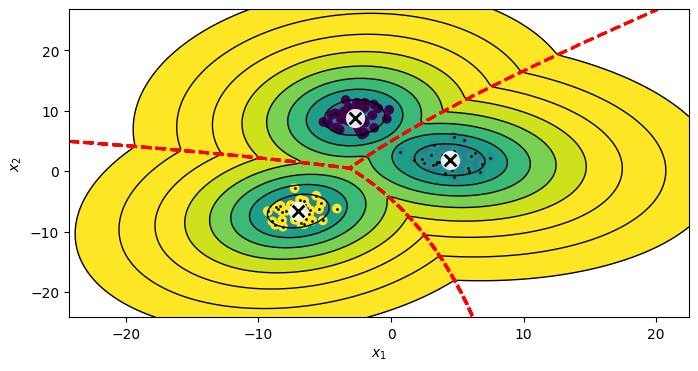

In [17]:
# extra code – this cells generates and saves Figure 9–16

from matplotlib.colors import LogNorm
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 15
    maxs = X.max(axis=0) + 15
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=90)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gmm_obj, X_data)
plt.scatter(X_data[:,0], X_data[:,1], c=y_labels)
plt.show()

The next step in the visualization is the contours. 

[Read about](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html) the options for contours, especially in terms of levels. In anomaly detection, we seek regions with low probability and it would be useful to be able to control contour lines to show that. 

There are some nice examples [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html). 

Another idea is to use a mask to find the outliers

_Hint:_ If you get really stuck with visualization, look at your text and recall that all of the code is on Github. 

---
## Part 2. On Your Own

Now it is time for you to play. Your final goal for today is to make an interesting plot and post it in the general Teams channel. Post a plot, one sentence of what it is, and your group number. Also, submit the notebook to D2L as usual. 

Here are some ideas:
* choose a new dataset (_e.g._ penguins, images, or the dataset for your project) and use GMM to find clusters
* GMMs can be used for anomaly detection, so you can use all of the different ways of making fake data (with varying levels of noise and widely choosing contours) to examine what outliers look like in the GMM framework. 
* Also, GMM has a `.predict_` method, which can be used for clustering (using AIC and BIC). An interesting use case would be this: can you spot outliers and *also* assign them to a cluster? That is, which points are outliers of which cluster? 

You get the idea - be creative and have fun! 


Text(0, 0.5, 'Bill length')

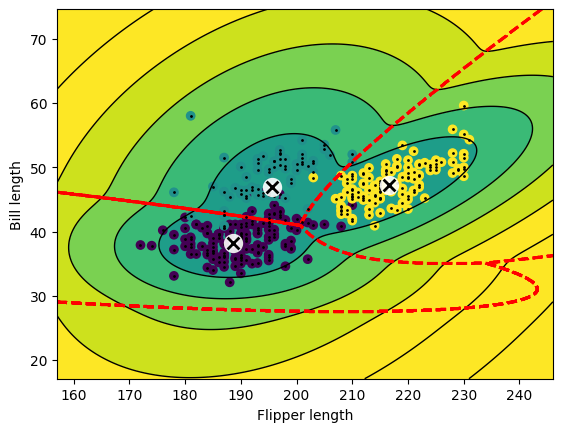

In [18]:
import seaborn as sns

penguin_df = sns.load_dataset("penguins").dropna()
flipper_length = penguin_df["flipper_length_mm"].values
bill_length = penguin_df["bill_length_mm"].values
labels = penguin_df["species"].astype('category').cat.codes.values



X_peng = np.vstack((flipper_length, bill_length)).T

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_peng)

plot_gaussian_mixture(gmm, X_peng)

plt.scatter(flipper_length, bill_length, c=labels)
plt.xlabel("Flipper length")
plt.ylabel("Bill length")

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.